In [13]:
from creators.ModelParams import ConvolutionalRecurrentLayerParams, RandomForestParams, RecurrentLayerParams, SVRParams
from creators.CRNNCreator import CRNNCreator, CRNNNetworkParams
from creators.RNNCreator import RNNCreator, RNNNetworkParams
from creators.CLSTMCreator import CLSTMCreator, CLSTMNetworkParams
from creators.RandomForestCreator import RandomForestCreator
from creators.SVRCreator import SVRCreator
from prep.HelperBlocks import split_3d_to_timeseries
from creators.CNN3DCreator import CNN3DCreator, CNN3DNetworkParams
from creators.ModelParams import Conv1DParams, Conv2DParams, Conv3DParams, DeepLayerParams, FlattenParams, GenericNeuralNetworkParams
from creators.CNN1DCreator import CNN1DCreator, CNN1DNetworkParams
from creators.CNN2DCreator import CNN2DCreator, CNN2DNetworkParams
from prep.HelperBlocks import pipe
import tensorflow as tf

drop=0.5

params_clstm = CLSTMNetworkParams(
    rec=[ConvolutionalRecurrentLayerParams(filters=15,kernel_size=(5,5))],
    flatten=FlattenParams(),
    deep=[DeepLayerParams(neurons=1000,dropout=drop,normalization=True),
          DeepLayerParams(neurons=400,dropout=drop,normalization=True)],
    generic=GenericNeuralNetworkParams(
        prepare_function=lambda data, is_test: data.transpose((0,3,1,2)).reshape((
            data.shape[0],
            15,
            10,
            data.shape[1],
            data.shape[2])).transpose((0,2,3,4,1)),
        epochs=50,
        optimizer=tf.keras.optimizers.Adam(),
        model=CLSTMCreator
        )
)

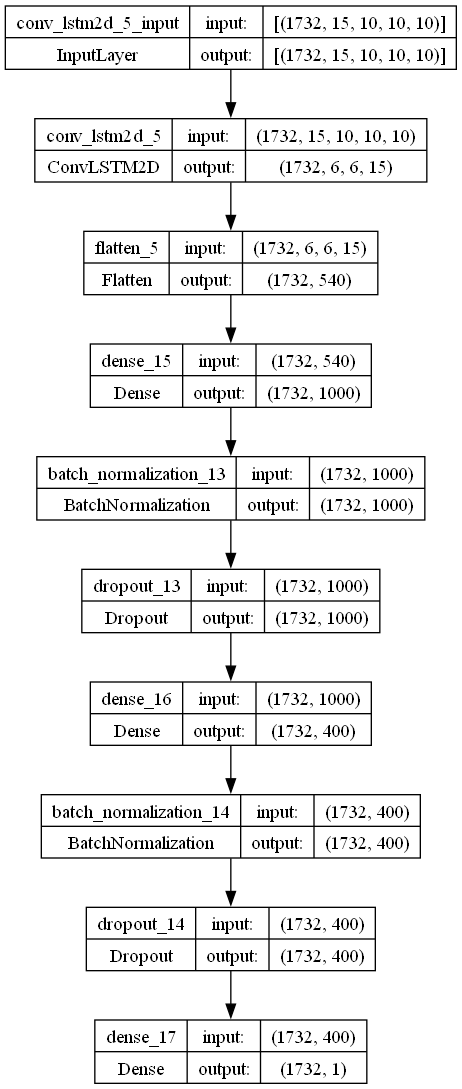

In [14]:
import numpy as np
from keras.utils import plot_model

all_data = np.load("./experiment1/exp_3d.npy")

model = params_clstm.generic.model(params_clstm)
model.build((1732,15,10,10,10))

plot_model(model, to_file='model_architecture.png', show_shapes=True)